# Partie 1 : Explorer les données et comparer deux quartiers 


In [3]:
# Importer les modules de statistiques depuis la bibliothèque SciPy. 
 # Charger les données contenant les ventes immobilières par quartier.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats # la bibliothèque scipy.stats pour effectuer un test statistique de Kolmogorov–Smirnov (KS)

# 1. Charger ton fichier modèle
df = pd.read_csv("AmesHousing.csv",)

# 2. Vérifier les colonnes disponibles
print(df.columns)

# 3. Aperçu rapide
df.head()
df.info()


Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [7]:
# Afficher le nombre de lignes et de colonnes
df.shape


(2930, 82)

In [15]:
# Voir toutes les colonnes
df.columns


Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [17]:
# Identifier tous les quartiers distincts
df["Neighborhood"].unique()
#Le jeu de données contient plusieurs quartiers différents. La méthode unique() permet d’afficher la liste complète des quartiers présents dans la variable Neighborhood.


array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

In [40]:
# Vérifier les différents quartiers (variable catégorielle "Neighborhood")
#Dans le jeu de données AmesHousing, la variable Neighborhood représente le quartier dans lequel se trouve chaque maison.
quartiers_counts = df["Neighborhood"].value_counts()

# Affichage
quartiers_counts


Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64

In [23]:
# Sélectionner les deux quartiers les plus représentés
# Les 2 quartiers les plus fréquents
top2_quartiers = quartiers_counts.head(2)
top2_quartiers


Neighborhood
NAmes      443
CollgCr    267
Name: count, dtype: int64

In [38]:
# Restreindre le DataFrame à ces deux quartiers
# Récupérer la liste des deux quartiers (index de la série top2_quartiers)
liste_quartiers = top2_quartiers.index.tolist()
liste_quartiers



['NAmes', 'CollgCr']

In [31]:
# # Filtrer le DataFrame pour ne garder que ces deux quartiers
df_2q = df[df["Neighborhood"].isin(liste_quartiers)].copy()

# Vérifier
df_2q["Neighborhood"].value_counts()


Neighborhood
NAmes      443
CollgCr    267
Name: count, dtype: int64

In [33]:
# Statistiques descriptives par quartier (SalePrice)
# Statistiques descriptives du prix de vente par quartier
stats_prix = df_2q.groupby("Neighborhood")["SalePrice"].describe()
stats_prix


,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
CollgCr,267.0,201803.434457,54187.843749,110000.0,160875.0,200000.0,228250.0,475000.0
NAmes,443.0,145097.349887,31882.707229,68000.0,127000.0,140000.0,157500.0,345000.0


In [35]:
# Transposer le tableau pour une meilleure lisibilité
stats_prix_T = stats_prix.T
stats_prix_T


Neighborhood,CollgCr,NAmes
count,267.000000,443.000000
mean,201803.434457,145097.349887
std,54187.843749,31882.707229
min,110000.000000,68000.000000
25%,160875.000000,127000.000000
50%,200000.000000,140000.000000
75%,228250.000000,157500.000000
max,475000.000000,345000.000000


# Partie2: Visualiser les distributions des prix de vente

In [43]:
# Extraire les prix de vente de North Ames et College Creek dans deux séries pandas distinctes
prix_NAmes = df_2q[df_2q["Neighborhood"] == "NAmes"]["SalePrice"]
prix_CollgCr = df_2q[df_2q["Neighborhood"] == "CollgCr"]["SalePrice"]

prix_NAmes.head(), prix_CollgCr.head()


(0     215000
 1     105000
 2     172000
 3     244000
 23    149000
 Name: SalePrice, dtype: int64,
 249    245350
 250    206000
 251    198900
 252    187000
 256    159000
 Name: SalePrice, dtype: int64)

In [45]:
# ÉRIFIER QUE LES DONNÉES SONT PROPRES
print("NAmes - valeurs manquantes :", prix_NAmes.isna().sum())
print("CollgCr - valeurs manquantes :", prix_CollgCr.isna().sum())

print("NAmes - valeurs négatives :", (prix_NAmes < 0).sum())
print("CollgCr - valeurs négatives :", (prix_CollgCr < 0).sum())

print("Types :", prix_NAmes.dtype, prix_CollgCr.dtype)


NAmes - valeurs manquantes : 0
CollgCr - valeurs manquantes : 0
NAmes - valeurs négatives : 0
CollgCr - valeurs négatives : 0
Types : int64 int64


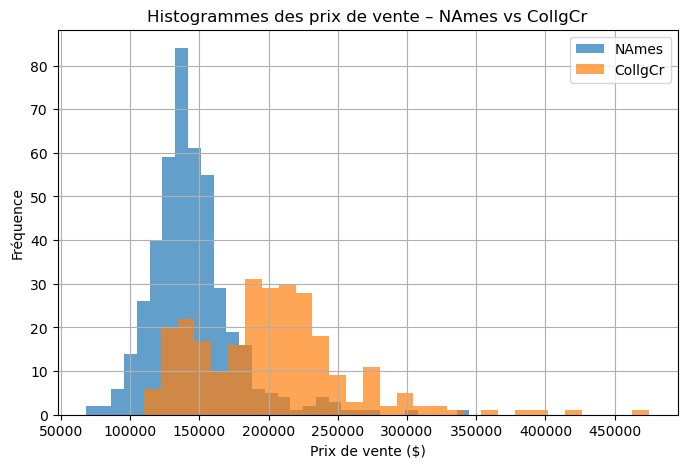

In [116]:
# Créer un histogramme pour North Ames, puis superposer celui de College Creek sur le même graphique

plt.figure(figsize=(8, 5))

plt.hist(prix_NAmes, bins=30, alpha=0.7, label="NAmes")
plt.hist(prix_CollgCr, bins=30, alpha=0.7, label="CollgCr")

plt.xlabel("Prix de vente ($)")
plt.ylabel("Fréquence")
plt.title("Histogrammes des prix de vente – NAmes vs CollgCr")
plt.legend()
plt.grid(True)
plt.show()


In [57]:
# Visualisation des distributions : Fonction de distribution cumulative (CDF)
# Convertir chaque série (NAmes, CollgCr) en DataFrame.
df_NAmes = prix_NAmes.to_frame(name='SalePrice')
df_CollgCr = prix_CollgCr.to_frame(name='SalePrice')


In [59]:
#ier les valeurs
# Calculer leur rang relatif en pourcentage avec .rank(pct=True)
# Pour NAmes
df_NAmes['CDF'] = df_NAmes['SalePrice'].rank(pct=True)
df_NAmes = df_NAmes.sort_values('SalePrice')

# Pour CollgCr
df_CollgCr['CDF'] = df_CollgCr['SalePrice'].rank(pct=True)
df_CollgCr = df_CollgCr.sort_values('SalePrice')


In [63]:
# Créer une fonction réutilisable plot_CDF() :
def plot_CDF(series, ax=None, label=None):
    df = series.to_frame(name='SalePrice')
    df['CDF'] = df['SalePrice'].rank(pct=True)
    df = df.sort_values('SalePrice')
    df.plot(x='SalePrice', y='CDF', ax=ax, label=label)
    return df


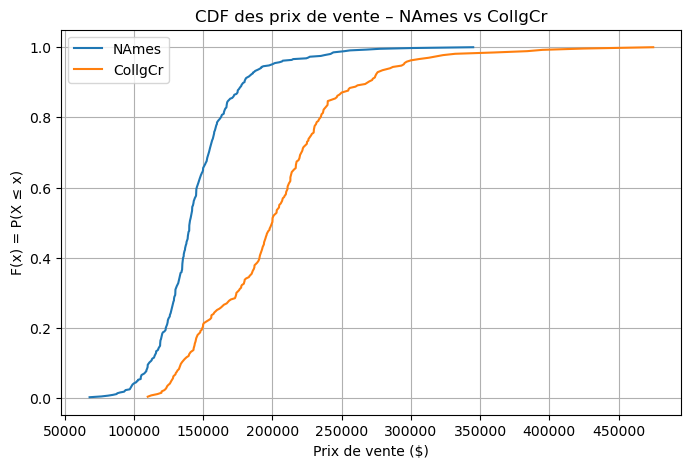

In [65]:
# Appeler la fonction pour NAmes et CollgCr en passant le même axe.
fig, ax = plt.subplots(figsize=(8, 5))

plot_CDF(prix_NAmes, ax=ax, label='NAmes')
plot_CDF(prix_CollgCr, ax=ax, label='CollgCr')

ax.set_title("CDF des prix de vente – NAmes vs CollgCr")
ax.set_xlabel("Prix de vente ($)")
ax.set_ylabel("F(x) = P(X ≤ x)")
ax.grid(True)
plt.show()


# Partie3: Exécuter un test statistique pour comparer deux distributions 

In [1]:
# Afficher la documentation 
#help(stats)


In [ ]:
ks_stat, p_value = stats.ks_2samp(prix_NAmes, prix_CollgCr)

print("Statistique KS :", ks_stat)
print("P-value :", p_value)


In [70]:
alpha = 0.05

if p_value <= alpha:
    print("Comme p ≤ 0.05, on rejette H0 : les deux distributions sont différentes.")
else:
    print("Comme p > 0.05, on ne rejette pas H0 : les deux distributions ne sont pas significativement différentes.")


Comme p ≤ 0.05, on rejette H0 : les deux distributions sont différentes.


# Partie 4: Tester la normalité des distributions 


In [86]:
# Appliquer le test Shapiro–Wilk
# Test Shapiro–Wilk pour North Ames
stat, p = stats.shapiro(prix_NAmes)

print("Statistique de test:", stat)
print("Valeur p:", p)

if p < 0.05:
    print(" La distribution n'est pas normale (rejet de H0).")
else:
    print("La distribution peut être considérée comme normale.")


Statistique de test: 0.8932009892779424
Valeur p: 5.124904026764063e-17
 La distribution n'est pas normale (rejet de H0).


In [126]:
# Tester la normalité pour College Creek
# Test Shapiro–Wilk pour College Creek
stat, p = stats.shapiro(prix_CollgCr)

print("Statistique de test:", stat)
print("Valeur p:", p)

if p < 0.05:
    print("La distribution n'est pas normale (rejet de H0).")
else:
    print("La distribution peut être considérée comme normale.")


Statistique de test: 0.9278154635655026
Valeur p: 4.162976796933535e-10
La distribution n'est pas normale (rejet de H0).


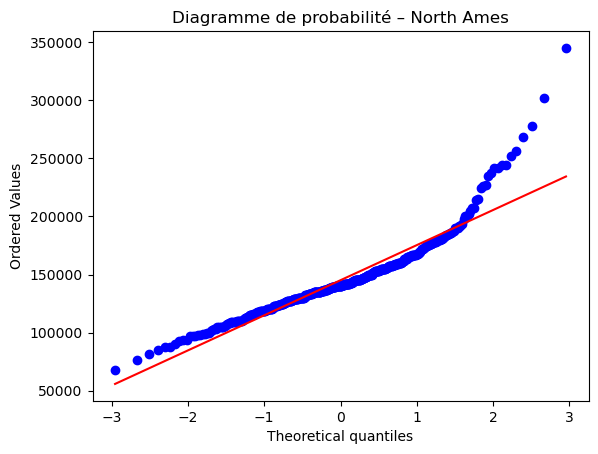

In [76]:
# Visualiser la normalité – Diagramme de probabilité (QQ-plot)
# QQ-plot – North Ames
fig, ax = plt.subplots()
stats.probplot(prix_NAmes, plot=ax)
plt.title("Diagramme de probabilité – North Ames")
plt.show()


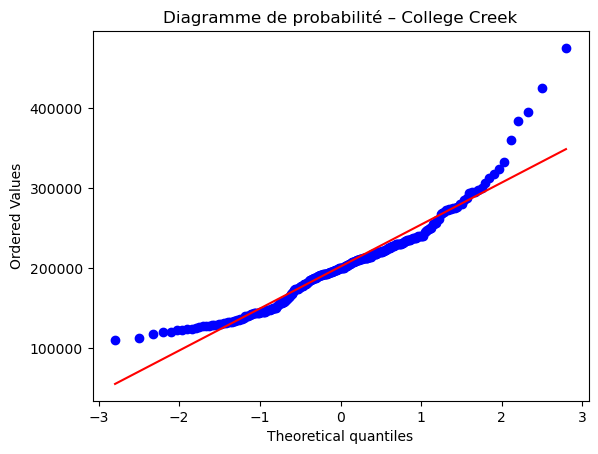

In [78]:
# QQ-plot – College Creek
fig, ax = plt.subplots()
stats.probplot(prix_CollgCr, plot=ax)
plt.title("Diagramme de probabilité – College Creek")
plt.show()


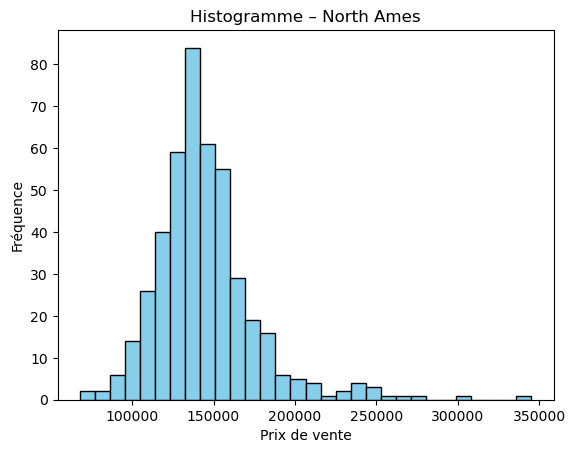

In [80]:
# Histogramme – North Ames
plt.hist(prix_NAmes, bins=30, color='skyblue', edgecolor='black')
plt.title("Histogramme – North Ames")
plt.xlabel("Prix de vente")
plt.ylabel("Fréquence")
plt.show()


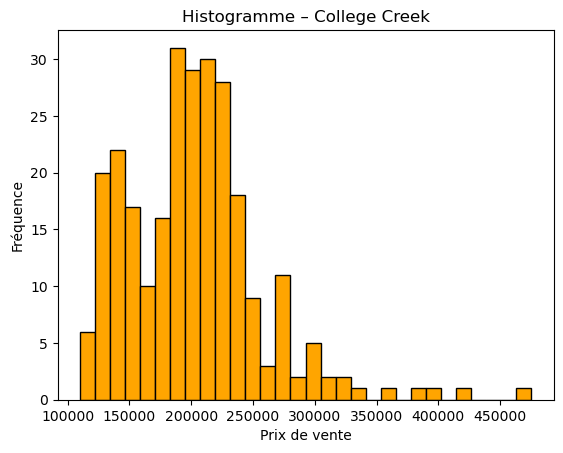

In [82]:
# Histogramme – College Creek
plt.hist(prix_CollgCr, bins=30, color='orange', edgecolor='black')
plt.title("Histogramme – College Creek")
plt.xlabel("Prix de vente")
plt.ylabel("Fréquence")
plt.show()


# Partie 5: Vérification de la répartition en pieds carrés

In [128]:
# Extraction des donnees
# Extraction des superficies du premier étage pour NAmes
n_ames_sf = df.loc[df['Neighborhood'] == 'NAmes', '1st Flr SF']

# Extraction des superficies du premier étage pour CollgCr
collgcr_sf = df.loc[df['Neighborhood'] == 'CollgCr', '1st Flr SF']
#  la colonne(1stFlrSF) correspondant à la superficie du premier étage .

n_ames_sf.head(), collgcr_sf.head()


(0     1656
 1      896
 2     1329
 3     2110
 23    1004
 Name: 1st Flr SF, dtype: int64,
 249    1694
 250    1208
 251    1226
 252    1222
 256     965
 Name: 1st Flr SF, dtype: int64)

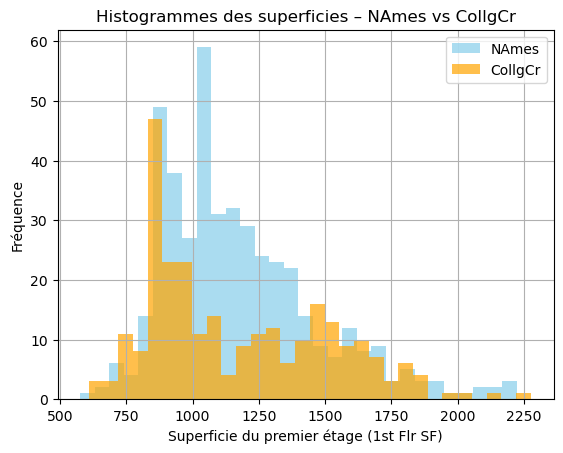

In [109]:
# Visualisation – Histogrammes superposés
ax = n_ames_sf.hist(alpha=0.7, bins=30, label='NAmes', color='skyblue')
collgcr_sf.hist(ax=ax, alpha=0.7, bins=30, label='CollgCr', color='orange')

ax.set_xlabel("Superficie du premier étage (1st Flr SF)")
ax.set_ylabel("Fréquence")
ax.set_title("Histogrammes des superficies – NAmes vs CollgCr")
ax.legend()
plt.show()

In [111]:
# est statistique – Kolmogorov–Smirnov (KS test)
statistic, p_value = stats.ks_2samp(n_ames_sf, collgcr_sf)

print("Statistique KS :", statistic)
print("P-value :", p_value)

Statistique KS : 0.15300851362433526
P-value : 0.0007057410997705426


In [113]:
# Interprétation automatique
alpha = 0.05

if p_value <= alpha:
    print(" p ≤ 0.05 → On rejette H0 : les distributions sont différentes.")
else:
    print(" p > 0.05 → On ne rejette pas H0 : les distributions sont semblables.")


 p ≤ 0.05 → On rejette H0 : les distributions sont différentes.


 # Conclusion générale